# Wrangle

- This project focuses on data wrangling.
- The data provided for this project is from the Udacity Data Analyst Nanodegree program 4th project
- Task is to focus on quality and tidiness issuessues

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

### Twitter archive

In [2]:
df_twitter_archive = pd.read_csv('./data/twitter-archive-enhanced.csv')
df_twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
df_twitter_archive.shape

(2356, 17)

### Image Predictions

In [4]:
import requests

In [5]:
url_image_predictions = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url_image_predictions)
file = open("./data/image-predictions.tsv", "wb")
file.write(response.content)
file.close()

In [6]:
df_image_predictions = pd.read_csv('./data/image-predictions.tsv', sep='\t')
df_image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Tweets json from udacity

In [7]:
import json

In [8]:
tweet_json_info = []

with open('./data/tweet-json.jsonl', 'r',encoding = 'utf-8') as json_file:
    line = json_file.readline()
    for line in json_file:
        json_data = json.loads(line)

        json_data_add = {'tweet_id':json_data['id'],
                         'favourites':json_data['favorite_count'],
                         'retweets':json_data['retweet_count']}
                          
        tweet_json_info.append(json_data_add)

In [9]:
tweet_json_info[0]

{'tweet_id': 892177421306343426, 'favourites': 33819, 'retweets': 6514}

In [10]:
df_tweets = pd.DataFrame(tweet_json_info,columns = ['tweet_id','favourites','retweets'])

In [11]:
df_tweets.head()

,tweet_id,favourites,retweets
0,892177421306343426,33819,6514
1,891815181378084864,25461,4328
2,891689557279858688,42908,8964
3,891327558926688256,41048,9774
4,891087950875897856,20562,3261


## Data Examination

In [12]:
df_twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


- date format is not DateTime 
- empty values sometimes NaN, sometimes None
- dog types could be in one columnmn

In [13]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- source could be categorical and links could be removed

In [14]:
df_twitter_archive.expanded_urls[7]

'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1'

In [15]:
df_twitter_archive.expanded_urls.isnull().sum()

59

In [16]:
# for na valuse added na=False
df_twitter_archive[df_twitter_archive.expanded_urls.str.contains("photo/2", na=False)]['expanded_urls']

Series([], Name: expanded_urls, dtype: object)

- expanded_urls should have been /photo/1  and  /photo/2  since on the Twitter page there are two photos with different links
- if they are all the same we could remove URLs and just keep count and generate the link using twit_idd

In [17]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- ids could be string, instead of float

In [18]:
df_twitter_archive.duplicated().sum()

0

In [19]:
# uncommon numerators 
df_twitter_archive.rating_numerator.value_counts()[-5:]

27     1
45     1
99     1
121    1
204    1
Name: rating_numerator, dtype: int64

In [20]:
# uncommon denominators
df_twitter_archive.rating_denominator.value_counts()[-5:]

130    1
150    1
170    1
7      1
0      1
Name: rating_denominator, dtype: int64

In [21]:
# dog_rates known to use 10 as denominator even the numerator is more than 10
# there might be a parsing issue if it the denominator is different than 10
df_twitter_archive[df_twitter_archive.rating_denominator != 10][['text','tweet_id']][:15]

,text,tweet_id
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,835246439529840640
342,@docmisterio account started on 11/15/15,832088576586297345
433,The floofs have been released I repeat the flo...,820690176645140481
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192
784,"RT @dog_rates: After so many requests, this is...",775096608509886464
902,Why does this never happen at my front door......,758467244762497024
1068,"After so many requests, this is Bretagne. She ...",740373189193256964
1120,Say hello to this unbelievably well behaved sq...,731156023742988288
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656
1202,This is Bluebert. He just saw that both #Final...,716439118184652801


- multiple dogs, multiplies the denominator like so; 5 dogs -> 50, 12 dogs -> 120
- dates mixed in as ratings, time (24/7)
- 7/11 shop 

In [22]:
# most common names
df_twitter_archive.name.value_counts()[:15]

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Buddy        7
an           7
Name: name, dtype: int64

In [23]:
df_twitter_archive[df_twitter_archive.name.str.len() < 3]['name'].value_counts()

a     55
Bo     9
an     7
Al     1
my     1
Ed     1
O      1
JD     1
Jo     1
by     1
Mo     1
Name: name, dtype: int64

In [24]:
# Unique dog names
df_twitter_archive.name.nunique()

957

In [25]:
# tweet ids of wrong named tweets
df_twitter_archive[df_twitter_archive.name == 'a'][['text','tweet_id']][:5]

,text,tweet_id
56,Here is a pupper approaching maximum borkdrive...,881536004380872706
649,Here is a perfect example of someone who has t...,792913359805018113
801,Guys this is getting so out of hand. We only r...,772581559778025472
1002,This is a mighty rare blue-tailed hammer sherk...,747885874273214464
1004,Viewer discretion is advised. This is a terrib...,747816857231626240


In [26]:
df_twitter_archive[df_twitter_archive.name == 'the'][['text','tweet_id']][:5]

,text,tweet_id
1527,Stop sending in lobsters. This is the final wa...,690360449368465409
1603,This is the newly formed pupper a capella grou...,685943807276412928
1797,This is the happiest pupper I've ever seen. 10...,677269281705472000
1815,This is the saddest/sweetest/best picture I've...,676613908052996102
2037,This is the best thing I've ever seen so sprea...,671561002136281088


In [27]:
# tweet ids of correctly named dogs
df_twitter_archive[df_twitter_archive.name == 'Charlie'][['text','tweet_id']][:5]

,text,tweet_id
230,RT @dog_rates: This is Charlie. He fell asleep...,847978865427394560
254,This is Charlie. He wants to know if you have ...,844580511645339650
261,This is Charlie. He's wishing you a very fun a...,842846295480000512
326,Meet Charlie. She asked u to change the channe...,833826103416520705
338,This is Charlie. He fell asleep on a heating v...,832369877331693569


- it looks like the regex parse expects a name after some defined strings like "this is.., here is..., Meet .."
- we could use a dog name dictionary and look for those names in the tweet
- alternative is to use the NER model to get the person names from the tweet (I am not a native English speaker so I don't know if dogs are often named after objects or human names)s)

In [28]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
# how certain is the model
df_image_predictions.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

## Iterating on Data Gathering

Although the purpose of the project is to identify quality and tidiness issues and fixing them, at this point, I wanted to not just work on the existing dataset but iterate on the data-gathering phase again.

The reason behind this is:
- I enjoy data gathering :)
- data available here is only until 2017
- since breed classification won't be available for the new data I might also work on the image classification problem. learn from it
- there could be a better model which could give more than %60 avg accuracy
- multiple images could be used for categorization also for videos thumbnail image could provide dog breed info
- names could come from a dog name dictionary or NER
- I found out about twint project and want to try ito try it


### Gathering twitter data

- There is a osint project called twint. which avoids API usage and its limits by scrapping tweets https://github.com/twintproject/twint
- Seeing how cool their charts are I followed their wiki to setup elasticsearch and kibana on docker
- There were some issue and quick fixes to be made https://github.com/twintproject/twint/issues/1040#issuecomment-737359393
  - Also the strptime function of datetime didn't work as intended with collected data ("%Z" part didn't catch EEST and only worked for PST and EST) I patched the code locally, I was going to create a PR but found out that someone already issued it
- After running the script I was able to get 11MB worth of jsonl tweets which contained the entire timeline of dog_rates
- I used kibana for some cool filters and visualizations on the data set. As a first-time user, I am impressed by the elasticsearch ecosystem.stem.

![kibana](images/kibana.png)

this is how twint downloads data to both electicsearch and stores as python

requires twint library to run
```
import twint

# Configure
c = twint.Config()
c.Username = "dog_rates"
c.Elasticsearch = "http://localhost:9200"
c.Store_json = True
c.Output = "dog_rates.json"

# Run
twint.run.Search(c)
```

## Load new data

In [30]:
df_tweets = pd.read_json('./data/dog_rates.json', lines=True)

In [31]:
df_tweets.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1367986147473858564,1367160218337959936,2021-03-06 02:51:28 Turkey Standard Time,2021-03-06,02:51:28,300,4196983835,dog_rates,WeRateDogs®,,...,,,,,,"[{'screen_name': 'brainyisnewsexy', 'name': '😷...",,,,


In [32]:
df_tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [33]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               12491 non-null  int64         
 1   conversation_id  12491 non-null  int64         
 2   created_at       12491 non-null  object        
 3   date             12491 non-null  datetime64[ns]
 4   time             12491 non-null  object        
 5   timezone         12491 non-null  int64         
 6   user_id          12491 non-null  int64         
 7   username         12491 non-null  object        
 8   name             12491 non-null  object        
 9   place            12491 non-null  object        
 10  tweet            12491 non-null  object        
 11  language         12491 non-null  object        
 12  mentions         12491 non-null  object        
 13  urls             12491 non-null  object        
 14  photos           12491 non-null  objec

- ids are int64
- date is converted to datetime
- however there are no null values (pd.read_json might added them with default values)

In [34]:
df_tweets.photos[:5]

0                                                   []
1                                                   []
2    [https://pbs.twimg.com/media/EvwLbfhVcAA6gfo.jpg]
3                                                   []
4    [https://pbs.twimg.com/media/Evvo-82UUAUrVk_.j...
Name: photos, dtype: object

In [35]:
df_tweets.translate[:5]

0    
1    
2    
3    
4    
Name: translate, dtype: object

- we need to remove empty lines, empty arrays and None values

In [36]:
df_tweets.photos[26]

['https://pbs.twimg.com/media/EvfXQ-JUUAUMbxy.jpg',
 'https://pbs.twimg.com/media/EvfXQ-LVkAkWVfa.jpg',
 'https://pbs.twimg.com/media/EvfXQ-KUUAIJCn0.jpg',
 'https://pbs.twimg.com/media/EvfXQ-KVgAEUhdx.jpg']

- unlike before photos now have direct image and not twitter link like https://twitter.com/dog_rates/status/890729181411237888/photo/1

In [37]:
df_tweets[['created_at', 'date', 'time', 'timezone']].head(1)

,created_at,date,time,timezone
0,2021-03-06 02:51:28 Turkey Standard Time,2021-03-06,02:51:28,300


- date, time, and timezone can be combined into one datetime format. created_at is a string that represents this combined value. removing all 4 to create one tidies the data

In [38]:
df_tweets[df_tweets.retweet]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


- retweets already filtered and all values are false, could remove this column

In [39]:
df_tweets[['user_id', 'username', 'name']].head(1)

,user_id,username,name
0,4196983835,dog_rates,WeRateDogs®


- these 3 also point to the same thing. user_id is enough to represent them all

In [40]:
df_tweets[df_tweets.reply_to.notnull()].tweet.head(5)

0                     @brainyisnewsexy @DisneyRaya 😂😂😂
1                    @Tasaraus @DisneyRaya it’s okay 😌
2    Officially, Tuk Tuk is 50% armadillo, 50% roly...
3                                @PickledPlatypuz lmao
4    This is Otis. He broke his femur jumping out o...
Name: tweet, dtype: object

In [41]:
df_tweets[df_tweets.quote_url.notnull()].reply_to.head(5)

0    [{'screen_name': 'brainyisnewsexy', 'name': '😷...
1    [{'screen_name': 'Tasaraus', 'name': 'Tas', 'i...
2                                                   []
3    [{'screen_name': 'PickledPlatypuz', 'name': '💯...
4                                                   []
Name: reply_to, dtype: object

- so reply to is used to reply to someone and includes "Replying to @..." in the title however you don't need to reply to someone using Twitter as it is meant to (you could also just say @... and mention them)
- there is also a quote option. not all quotes are replied to that person. you can quote and share it on your timeline
- these two are not something we are looking for we can filter tweets with a quote and replyly

In [42]:
df_tweets[df_tweets.hashtags.notnull()].hashtags.head(5)

0                  []
1                  []
2    [disneyraya, ad]
3                  []
4                  []
Name: hashtags, dtype: object

In [43]:
df_tweets[df_tweets.mentions.notnull()].mentions.head(5)

0    []
1    []
2    []
3    []
4    []
Name: mentions, dtype: object

In [44]:
df_tweets[df_tweets.urls.notnull()].urls.head(5)

0                          []
1                          []
2    [http://Disney.com/raya]
3                          []
4                          []
Name: urls, dtype: object

- we can also remove these columns "link","hastags","language","mentions","conversation_id", "urls"

## Cleaning

In [45]:
# make a copy of the original dataframe
df_tweets_original = df_tweets.copy()

### Define

The twint project doesn't put nulls when scraping tweets. It uses empty strings, arrays. This is a problem when we want to clean the dataset

In [46]:
df_tweets_original.photos[:5]

0                                                   []
1                                                   []
2    [https://pbs.twimg.com/media/EvwLbfhVcAA6gfo.jpg]
3                                                   []
4    [https://pbs.twimg.com/media/Evvo-82UUAUrVk_.j...
Name: photos, dtype: object

### Code

In [47]:
# remove empty arrays, None values and empty strings so they can be seen as Nan
df_tweets = df_tweets.where(~df_tweets.applymap(lambda x: x == [] or x is None or x == ""))

### Test

In [48]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               12491 non-null  int64         
 1   conversation_id  12491 non-null  int64         
 2   created_at       12491 non-null  object        
 3   date             12491 non-null  datetime64[ns]
 4   time             12491 non-null  object        
 5   timezone         12491 non-null  int64         
 6   user_id          12491 non-null  int64         
 7   username         12491 non-null  object        
 8   name             12491 non-null  object        
 9   place            0 non-null      object        
 10  tweet            12491 non-null  object        
 11  language         12491 non-null  object        
 12  mentions         301 non-null    object        
 13  urls             1912 non-null   object        
 14  photos           3449 non-null   objec

### Define

- cleaning empty strings and array revealed that there are empty columns
- we should drop them

In [49]:
df_tweets.shape

(12491, 36)

### Code

In [50]:
# drop empty columns
empty_columns = []
for column in  df_tweets.columns:
    if df_tweets[column].isnull().all():
        empty_columns.append(column)

df_tweets.drop(empty_columns, axis=1, inplace=True)

### Test

In [51]:
df_tweets.shape

(12491, 24)

### Define
There are other columns I am not planning to use. They should be dropped

In [52]:
df_tweets.shape

(12491, 24)

### Code

In [53]:
unused_columns = ["link","hashtags","language","mentions","conversation_id", "urls", "retweet"]
df_tweets.drop(unused_columns, axis=1, inplace=True)

In [54]:
df_tweets[df_tweets.reply_to.notnull()].tweet.head(5)
df_tweets[df_tweets.quote_url.notnull()].reply_to.head(5)

50     [{'screen_name': 'clintisawesome', 'name': 'Cl...
188    [{'screen_name': 'Candace_Dx', 'name': 'Candac...
202                                                  NaN
228                                                  NaN
249                                                  NaN
Name: reply_to, dtype: object

In [55]:
# remove tweets with quote since they are not dog ratings
df_tweets = df_tweets[~df_tweets.quote_url.notnull()]

In [56]:
# remove replies 
df_tweets = df_tweets[~df_tweets.reply_to.notnull()]

In [57]:
# and drop quote_url and reply_to
df_tweets.drop(['quote_url', 'reply_to'], axis=1, inplace=True)

In [58]:
# we can keep only user_id and drop username and name since they point to the same value. however I am also going to drop user_id since the project is only focused on dog_rates
df_tweets.drop(['user_id', 'username', 'name'], axis=1, inplace=True)

### Test

In [59]:
df_tweets.shape

(5227, 12)

In [60]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5227 entries, 2 to 12490
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5227 non-null   int64         
 1   created_at      5227 non-null   object        
 2   date            5227 non-null   datetime64[ns]
 3   time            5227 non-null   object        
 4   timezone        5227 non-null   int64         
 5   tweet           5227 non-null   object        
 6   photos          3307 non-null   object        
 7   replies_count   5227 non-null   int64         
 8   retweets_count  5227 non-null   int64         
 9   likes_count     5227 non-null   int64         
 10  video           5227 non-null   int64         
 11  thumbnail       3552 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 530.9+ KB


### Define

There are 4 columns for showing date information. We could combine them and increase the tidiness

### Code

In [61]:
df_tweets.timezone.value_counts()

300    5227
Name: timezone, dtype: int64

- only timezone iz 0300


In [62]:
import datetime

In [63]:
def combine_date_time(df_date, df_time):
    # 300 is the only timezone used in the dataset
    return pd.to_datetime(str(df_date.date()) + " " + df_time + "-0300")

In [64]:
df_tweets['datetime'] = df_tweets.apply(lambda x: combine_date_time(x.date, x.time), axis=1)

In [65]:
# drop old time related columns
df_tweets.drop(['date', 'created_at', 'time', 'timezone'], axis=1, inplace=True)

### Test

In [66]:
df_tweets.head()

,id,tweet,photos,replies_count,retweets_count,likes_count,video,thumbnail,datetime
2,1367980957563645955,"Officially, Tuk Tuk is 50% armadillo, 50% roly...",[https://pbs.twimg.com/media/EvwLbfhVcAA6gfo.jpg],22,101,3464,1,https://pbs.twimg.com/media/EvwLbfhVcAA6gfo.jpg,2021-03-06 02:30:50-03:00
4,1367943120906686466,This is Otis. He broke his femur jumping out o...,[https://pbs.twimg.com/media/Evvo-82UUAUrVk_.j...,148,1672,27796,1,https://pbs.twimg.com/media/Evvo-82UUAUrVk_.jpg,2021-03-06 00:00:29-03:00
8,1367882960406421507,This is King. He’s been living on the streets ...,[https://pbs.twimg.com/media/EvuyTV3UcAQXdYN.j...,99,2224,22729,1,https://pbs.twimg.com/media/EvuyTV3UcAQXdYN.jpg,2021-03-05 20:01:26-03:00
13,1367216213915443201,This is Minnie. She’s the Executive Pen Transp...,NaN,1256,29356,195085,1,https://pbs.twimg.com/ext_tw_video_thumb/13672...,2021-03-03 23:52:01-03:00
17,1367160218337959941,This is Tuk Tuk. He’s the cutest travel compan...,NaN,199,1043,18565,1,https://pbs.twimg.com/media/EvkWUcyVEAIA8Y0.jpg,2021-03-03 20:09:31-03:00


- first photo of the photos and thumbnail sometimes have the same URL. however, it is not an exact duplication issue
- sometimes the twit has a video and thumbnail of that video but no image so we should keep thumbnail  

## Dog names

- I am going to combine several resources
- I will first test then create a function to get the name from a tweett

In [67]:
test_data = df_tweets.head(50).tweet.to_numpy()

In [68]:
import re

cleaned_test_data = []
for item in test_data:
    # remove url, @mentions, #hastagas
    clened_item = re.sub(r'https?:\/\/.*[\r\n]*|(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)', ' ', item, flags=re.MULTILINE)
    cleaned_test_data.append(clened_item)

test_data = cleaned_test_data

In [69]:
# nlp library
import spacy

# sample data
nlp = spacy.load("en_core_web_sm")

for item in test_data:
    doc = nlp(item)

    possible_names = []
    # ner for person and product tags (tested predefined tags and quite a lot of dog names seen as product)
    for ent in doc.ents:
        if ent.label_ == "PRODUCT":
            possible_names.append(ent)
        if ent.label_ == "PERSON":
            possible_names.append(ent)
    if len(possible_names) > 0:
        print(possible_names)


[Otis]
[Gussie]
[Rhett, Rhett]
[Mya]
[Wrigley]
[Calvin]
[Kip]
[Jay]
[Mario Brothers, Snowelle]
[Queenie, Queenie]
[Sheba]
[Stan, Stan]
[Lola]
[Shanel]
[Fanny]
[Lewis]
[Grendel]
[Koda]
[Laryngeal Paralysis Polyneuropothy]
[Lucy Lu]
[Pearl]
[Gen]
[Stella]


- looks promising but has false positives like "Mario Brothers"

In [70]:
# 500 popular dog names gathered from internet
popular_dog_names = []
with open("./data/popular_dog_names.txt","r") as file_dognames:
    for line in file_dognames:
        popular_dog_names.append(line.strip())

In [71]:
for item in test_data:
    for dog_name in popular_dog_names:
        if dog_name in item:
            print(dog_name)

Otis
King
Minnie
Gus
Betty
Mya
Star
Wrigley
Hope
Ava
Bean
Champ
Sheba
Lola
Sky
Ellie
Sugar
Fanny
Lewis
Koda
Chloe
Lucy
Pearl
Stella


- finally the regex method
- unfortunately, I couldn't get spacy rule-based matching to work, will use vanilla regexx

In [72]:
for item in test_data:
    regexp = re.compile("This is ([A-Za-z ]*)|Meet ([A-Za-z ]*)")
    result = regexp.search(item)
    if result:
        dog_name = result.group(1)
        if not dog_name:
            dog_name = result.group(2)
        print(dog_name)

Otis
King
Minnie
Tuk Tuk
Gussie
Rivers
Kovu
Jiho
Betty and Rhett
Mya
Wrigley
Burger
Tonkey
Calvin
Kip
Jay
Peyton
Snowelle
Mint
Mogwai
Beans
Aubrey
Champ
Queenie
Sheba
Daenerys
Doc
Stan
Lola
Shanel
Sky
Sugar and Ellie
Fanny
Lewis
Grendel
Koda
Chloe
Paul
Lucy Lu
Pearl
Gen
Kiba
Wilber
Stella


- combining all solutions

In [73]:
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
intro_regex = re.compile("This is ([A-Za-z ]*)|Meet ([A-Za-z ]*)")

def get_dog_name(item):
    # remove url, @mentions, #hastagas
    item = re.sub(r'https?:\/\/.*[\r\n]*|(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)', ' ', item, flags=re.MULTILINE)

    doc = nlp(item)
    # search with NER
    possible_names = []
    for ent in doc.ents:
        if ent.label_ == "PRODUCT":
            possible_names.append(str(ent))
        if ent.label_ == "PERSON":
            possible_names.append(str(ent))

    # search among popular dog names
    for dog_name in popular_dog_names:
        if dog_name in item:
            possible_names.append(dog_name.strip())

    # search with regex
    result = intro_regex.search(item)
    if result:
        dog_name = result.group(1)
        if not dog_name:
            dog_name = result.group(2)
        possible_names.append(dog_name.strip())
    
    if len(possible_names) > 0:
        c = Counter(possible_names)
        selected_name = c.most_common(1)[0][0]

        # if name is too long it is probably not right
        if len(selected_name) < 15:
            return selected_name
    return np.nan

In [74]:
df_tweets['dog_name'] = df_tweets.apply(lambda x: get_dog_name(x.tweet), axis=1)

In [75]:
df_tweets[df_tweets.dog_name.notna()].shape

(2862, 10)

- 2862 rows with dog names

In [76]:
df_tweets[df_tweets.dog_name.notna()].dog_name.value_counts()[:40]

Bo         65
Charlie    31
Bear       20
Cooper     18
Oliver     18
Moose      16
Milo       16
Lucy       16
Toby       16
Hope       14
Tucker     14
Bella      13
Winston    13
Ava        13
Maggie     13
Remi       12
Penny      12
Daisy      12
Max        11
Lola       11
Jax        11
Archie     11
Jack       11
Bailey     10
Sam        10
Ollie      10
Leo        10
Dave       10
Bentley     9
Stanley     9
Sadie       9
Koda        9
Finn        9
Beau        9
Zoey        9
Atlas       9
Luna        9
Pipsy       9
Ruby        9
Duke        8
Name: dog_name, dtype: int64

## Dog scores

In [77]:
test_string = 'dog score  15/10 is but not 10/10/50 and 15/ 52 or 14 /20 it'

In [78]:
# negatif lookahead to omit dates
score_regex = re.compile("\s([\d]{1,3}\/[\d]{2,3})(?!\/)")
result = score_regex.search(test_string)
if result:
    print(result.group().split('/'))

[' 15', '10']


In [79]:
# returns pandas series first item is numerator, second denominator
def get_dog_score(item):
    # remove url, @mentions, #hastagas
    item = re.sub(r'https?:\/\/.*[\r\n]*|(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)', ' ', item, flags=re.MULTILINE)
    
    result = score_regex.search(item)
    if result:
        rating_parts = result.group(1).split('/')
        return pd.Series([rating_parts[0],rating_parts[1]])
    return pd.Series([np.nan,np.nan])

In [80]:
df_tweets[['rating_numerator','rating_denominator']] = df_tweets.apply(lambda x: get_dog_score(x.tweet), axis=1)

In [81]:
df_tweets[['rating_numerator','rating_denominator']].head()

,rating_numerator,rating_denominator
2,NaN,NaN
4,13,10
8,13,10
13,13,10
17,14,10


## Dog stages

In [82]:
dog_stages = ['floofer', 'pupper', 'puppo', 'poggo', 'doggo']

In [83]:
def find_dog_stage(item: str):
    # remove url, @mentions, #hastagas
    item = re.sub(r'https?:\/\/.*[\r\n]*|(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)', ' ', item, flags=re.MULTILINE)

    # ignore case
    found_dog_stages = re.findall(r"(?=("+'|'.join(dog_stages)+r"))", item, flags=re.IGNORECASE)

    # if we match multiple dog stages, there could be multiple dogs in the image
    if len(found_dog_stages) == 1:
        dog_stage = found_dog_stages[0].lower()
        return dog_stage
    return np.nan

In [84]:
df_tweets['dog_stage'] = df_tweets.apply(lambda x: find_dog_stage(x.tweet), axis=1)

In [85]:
df_tweets.dog_stage.value_counts()

pupper     266
doggo      110
puppo       51
floofer      8
Name: dog_stage, dtype: int64

## Dog image prediction

Intro

- I thought my google skills were enough to find a dog breed classifier model and quickly use it. it was going to be a 20-minute adventure, in and out, simple. However, it took 5 days
- I made it complex and overestimated my mnist experience


Efficientnet - Standford dogs

- Started here https://www.kaggle.com/c/dog-breed-identification
- Then used transfer learning on efficientnetb7 with Standford dogs dataset with the help of this repo https://github.com/agg-shambhavi/Stanford-Dogs-
- Somehow wrote the labels in the wrong order and after training reverse-engineered the labels using train data
- although acc was around %80, with dog_rates images it didn't give good results due to (I am guessing) low resolution (244px) and scaling


![enetb7](images/efficientnet.png)

API-Net

- After that, I found a benchmark here -> https://paperswithcode.com/sota/fine-grained-image-classification-on-stanford-1 
- Tried using the top model (%90 acc - API-Net). It was built on python2.7 and PyTorch 0.4.1 which I spend a day to make work in venv with the code in the repo. 
- After so many compatibility issues and patches and hardcoded values that only existed in the creator's environment, I gave up
- At this time I started testing various paid API services and generic image classification models.
- Google lens on my phone was working so good at classifying dog breeds it gave me the motivation to continue :) 


Resnet - Tsinghua Dogs

- Started from the beginning again. Searched for a larger dataset. I found Tsinghua dogs https://doi.org/10.1007/s41095-020-0184-6
- https://cg.cs.tsinghua.edu.cn/ThuDogs/ and without realizing downloaded the default dataset (high-resolution images) ~40GB
- Here I shouldn't have got greedy and instead used low-res images. Because I couldn't train high res dataset on my setup, couldn't configure it to run on gcloud. even spent time on tpus
- Using this repo I trained a model (resnet50 with proxy-nca loss) -> https://github.com/QuocThangNguyen/deep-metric-learning-tsinghua-dogs
- It was going to take ~80hours to train 100 epocs. 50 epocs later a runtime Cuda error halt the process. (when MAP was %70 and hit in top5 was around %90)

![enetb7](images/cuda_err.png)

- I think the setup got heated and It restarted the GPU interface. I fall back to using 1 GPU to test if this was the issue
- unfortunately, this opensource project did not configure itself to continue over checkpoints
- luckily after some trial and error I was able to patch it to continue from the latest checkpoint with epocs and itters intact
- when the Mean average precision was around %70 i stopped the model. after 50 hours
- the model I got performed horribly. had a top1 accuracy of 5.62%  I guess while patching the checkpoints I made a mistake.

![fail](images/tsne_fail.png)

- on the bright side I got some understanding from the code. learned quite a lot about PyTorch, datasets, loaders, and overall train/eval/test steps
- Unlike a model with a prediction head like mnist, this one encodes the input image. the output we get is a 128 size embedding. regardless of its shape, class, or the class size of our training data.
- looks similar to how transformers like BERT embeds a word. 
- since we don't have a class as an output, in this project prediction is done using nearest neighbors.
- labeled training data (60k images) is embedded and indexed using https://github.com/facebookresearch/faiss
- when you want to make a prediction you crate an embedding of the image and look for the nearest neighbor in this index.
- after finding the index backtracking your steps leads to the training file and the label from it. I also created a class mapper script for this.
- since this method doesn't give probabilities to each class that sums up to 1, I don't have the p1_conf field the original table had.
- in this setup to get something like that I could increase the search parameter in faiss. meaning looking for more nearest neighbors and getting their mode could lead to the most common one. also dividing top-class # by the k might give a confidence percentage.
- but let's say if k is 100 and there aren't 100 images of that dog breed then this would lead to the wrong accuracy. this is something I made up, there probably is a better way to get the probability


- at this point decided to train one more model and give up if it doesn't work. 
- this time I used triplet loss. it took about two days to get to epoch 100.
- model performed quite well so I decided to use it.


![fail](images/training_done.png)



Similarity matrix of some images in the dataset set
- the more bule the cell the more similar the images

![similarity](images/similarity.jpg)

T-SNE on WeRateDogs data

![tsne](images/tsne_images.jpg)


## Importing predictions

In [86]:
df_predictions = pd.read_csv('./data/predictions.tsv', sep='\t', names=["breed_prediction", "twitter_id", "image_index"])


In [87]:
df_predictions.head()

,breed_prediction,twitter_id,image_index
0,Siberian_husky,1000048866169950208,0
1,Siberian_husky,1000048866169950208,1
2,Siberian_husky,1000048866169950208,2
3,Pomeranian,1000048866169950208,3
4,teddy,1000524870239817728,0


In [88]:
df_predictions.image_index.value_counts()


T    3452
0    3448
1    1343
2     570
3     388
t       1
Name: image_index, dtype: int64

- here T means thumbnail, 0 first image, 1 second and so on

In [89]:
df_predictions.breed_prediction.value_counts()


golden_retriever        1623
Labrador_retriever      1132
chinese_rural_dog        903
Cardigan                 557
teddy                    527
                        ... 
briard                     2
Bouvier_des_Flandres       2
Irish_setter               1
Irish_wolfhound            1
cairn                      1
Name: breed_prediction, Length: 120, dtype: int64

## Cleaning predictions dataset

In [90]:
df_predictions_original = df_predictions.copy()

### Define
For some tweets we have multiple breed prediction. This happens when tweet contains multiple images. 

For those tweets we should get the most common prediction and use it as tweet's dog breed

In [91]:
df_predictions.groupby(['twitter_id']).head()

,breed_prediction,twitter_id,image_index
0,Siberian_husky,1000048866169950208,0
1,Siberian_husky,1000048866169950208,1
2,Siberian_husky,1000048866169950208,2
3,Pomeranian,1000048866169950208,3
4,teddy,1000524870239817728,0
...,...,...,...
9197,Labrador_retriever,/998712473707536384,T
9198,miniature_pinscher,/999080471047888896,T
9199,golden_retriever,/999321385729224704,T
9200,chinese_rural_dog,/999439888381595648,T


### Code

- twitter id is not parsed right, fixing it as sub task

In [92]:
df_predictions['twitter_id'] = df_predictions['twitter_id'].str.replace('[^0-9]' ,'')

- for a tweet this gets most common breed identified

In [93]:
df_predictions = df_predictions.groupby(['twitter_id'])['breed_prediction'].agg(lambda x:x.value_counts().index[0]).to_frame().reset_index()

### Test

In [94]:
df_predictions.head()

,twitter_id,breed_prediction
0,1000048866169950208,Siberian_husky
1,1000524870239817728,miniature_schnauzer
2,1000890686697365504,Border_collie
3,1001150535272198144,Samoyed
4,1001170590038970371,golden_retriever


In [95]:
df_predictions.breed_prediction.value_counts()

golden_retriever              610
Labrador_retriever            414
chinese_rural_dog             331
Cardigan                      205
teddy                         198
                             ... 
bloodhound                      1
keeshond                        1
Greater_Swiss_Mountain_dog      1
Brabancon_griffo                1
briard                          1
Name: breed_prediction, Length: 116, dtype: int64

In [96]:
df_predictions.twitter_id.nunique()

3453

In [97]:
# convert id to string inorder to merge two dataframes
df_tweets.id = df_tweets.id.astype(str)

In [98]:
df_tweets.head()

,id,tweet,photos,replies_count,retweets_count,likes_count,video,thumbnail,datetime,dog_name,rating_numerator,rating_denominator,dog_stage
2,1367980957563645955,"Officially, Tuk Tuk is 50% armadillo, 50% roly...",[https://pbs.twimg.com/media/EvwLbfhVcAA6gfo.jpg],22,101,3464,1,https://pbs.twimg.com/media/EvwLbfhVcAA6gfo.jpg,2021-03-06 02:30:50-03:00,NaN,NaN,NaN,NaN
4,1367943120906686466,This is Otis. He broke his femur jumping out o...,[https://pbs.twimg.com/media/Evvo-82UUAUrVk_.j...,148,1672,27796,1,https://pbs.twimg.com/media/Evvo-82UUAUrVk_.jpg,2021-03-06 00:00:29-03:00,Otis,13,10,NaN
8,1367882960406421507,This is King. He’s been living on the streets ...,[https://pbs.twimg.com/media/EvuyTV3UcAQXdYN.j...,99,2224,22729,1,https://pbs.twimg.com/media/EvuyTV3UcAQXdYN.jpg,2021-03-05 20:01:26-03:00,King,13,10,NaN
13,1367216213915443201,This is Minnie. She’s the Executive Pen Transp...,NaN,1256,29356,195085,1,https://pbs.twimg.com/ext_tw_video_thumb/13672...,2021-03-03 23:52:01-03:00,Minnie,13,10,NaN
17,1367160218337959941,This is Tuk Tuk. He’s the cutest travel compan...,NaN,199,1043,18565,1,https://pbs.twimg.com/media/EvkWUcyVEAIA8Y0.jpg,2021-03-03 20:09:31-03:00,Tuk Tuk,14,10,NaN


In [99]:
df_tweets = pd.merge(df_tweets, df_predictions, left_on='id', right_on='twitter_id', how='left').drop('twitter_id', axis=1)

### Define

- now we could also drop thumbnail, photos and video

In [100]:
df_tweets.tail(1)

,id,tweet,photos,replies_count,retweets_count,likes_count,video,thumbnail,datetime,dog_name,rating_numerator,rating_denominator,dog_stage,breed_prediction
5226,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,[https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg],22,443,2344,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,2015-11-16 01:32:08-03:00,NaN,8,10,NaN,Border_collie


### Code

In [101]:
df_tweets.drop(['photos', 'thumbnail', 'video'], axis=1, inplace=True)


### Test

In [102]:
df_tweets.tail(1)

,id,tweet,replies_count,retweets_count,likes_count,datetime,dog_name,rating_numerator,rating_denominator,dog_stage,breed_prediction
5226,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,22,443,2344,2015-11-16 01:32:08-03:00,NaN,8,10,NaN,Border_collie


### Define

- we could also remove rows that doesn't have rating numerator. since this analysis focuses on dog ratings

### Code

In [103]:
df_tweets = df_tweets[df_tweets.rating_numerator.notna()]

### Test

In [104]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3273 entries, 1 to 5226
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype                                 
---  ------              --------------  -----                                 
 0   id                  3273 non-null   object                                
 1   tweet               3273 non-null   object                                
 2   replies_count       3273 non-null   int64                                 
 3   retweets_count      3273 non-null   int64                                 
 4   likes_count         3273 non-null   int64                                 
 5   datetime            3273 non-null   datetime64[ns, pytz.FixedOffset(-180)]
 6   dog_name            2593 non-null   object                                
 7   rating_numerator    3273 non-null   object                                
 8   rating_denominator  3273 non-null   object                                
 9   dog_stag

In [105]:
df_tweets.sample(5)

,id,tweet,replies_count,retweets_count,likes_count,datetime,dog_name,rating_numerator,rating_denominator,dog_stage,breed_prediction
4662,675853064436391936,Here we have an entire platoon of puppers. Tot...,16,1196,2531,2015-12-13 04:41:41-03:00,NaN,88,80,pupper,chinese_rural_dog
5206,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,1,57,131,2015-11-16 19:11:11-03:00,an Albanian,9,10,NaN,Bichon_Frise
5098,668221241640230912,These two dogs are Bo &amp; Smittens. Smittens...,1,179,474,2015-11-22 03:15:33-03:00,Bo,10,10,NaN,golden_retriever
3994,707297311098011648,This is Cassie. She can go from sweet to scary...,20,746,2680,2016-03-08 23:09:54-03:00,Cassie,10,10,NaN,Border_collie
4255,691675652215414786,This is Richie and Plip. They are the best of ...,9,486,1883,2016-01-25 20:35:00-03:00,Richie,10,10,NaN,French_bulldog


- much more compact dataset
- has focused information about dog ratings and their analytics
- has a way to refer back to original tweet
- looks more tidy

now we can continue with analysis

## Analysis

In [106]:
import seaborn as sns

In [107]:
primary_chart_color = '#00ccee'
sns_palette = 'Greens_d'

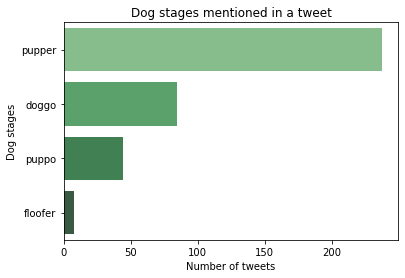

In [108]:
sns.countplot(y='dog_stage', data=df_tweets, palette=sns_palette)
plt.title('Dog stages mentioned in a tweet')
plt.ylabel('Dog stages')
plt.xlabel('Number of tweets');

In [109]:
stages = df_tweets.dog_stage.value_counts()
stages

pupper     238
doggo       85
puppo       44
floofer      8
Name: dog_stage, dtype: int64

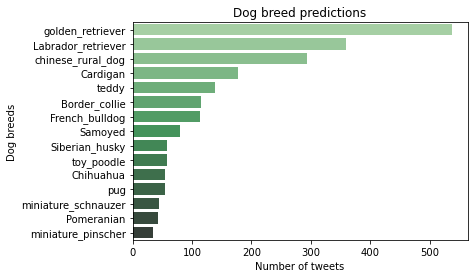

In [110]:
sns.countplot(y='breed_prediction', data=df_tweets, palette=sns_palette, order=df_tweets.breed_prediction.value_counts().iloc[:15].index)
plt.title('Dog breed predictions')
plt.ylabel('Dog breeds')
plt.xlabel('Number of tweets');

- retriever type is the most rated dog

In [111]:
# dog breeds that are posted atleast 50 times
df_top_predicted_dogs = df_tweets.groupby("breed_prediction").filter(lambda x: len(x) > 50)

In [112]:
mean_like_of_breed = df_top_predicted_dogs.groupby(['breed_prediction'])['likes_count'].mean().reset_index().sort_values(by=['likes_count'])
mean_like_of_breed

,breed_prediction,likes_count
9,pug,18288.296296
10,teddy,20857.568345
2,Chihuahua,23786.545455
7,chinese_rural_dog,24057.187075
11,toy_poodle,26204.327586
6,Siberian_husky,26555.137931
1,Cardigan,31056.735955
5,Samoyed,35503.450000
0,Border_collie,38309.365217
4,Labrador_retriever,40751.505556


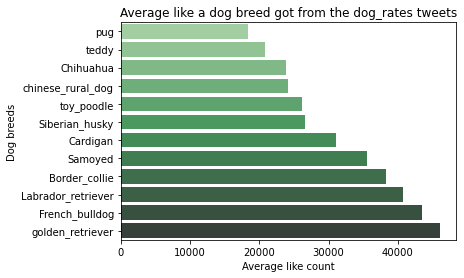

In [113]:
sns.barplot(y='breed_prediction', x='likes_count', data=mean_like_of_breed, palette=sns_palette)
plt.title('Average like a dog breed got from the dog_rates tweets')
plt.ylabel('Dog breeds')
plt.xlabel('Average like count');

- to get most likes one might select a retriever, bulldog or a border collie

In [114]:
df_monthly_likes =  df_tweets.groupby(pd.Grouper(key='datetime',freq='M'))['likes_count'].sum().reset_index()

In [115]:
sns.color_palette(sns_palette)[0]

(0.5496501345636294, 0.8032449058054595, 0.565044213763937)

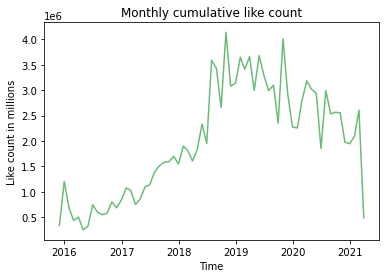

In [116]:
sns.lineplot(data=df_monthly_likes, x="datetime", y="likes_count",  color=sns.color_palette(sns_palette)[1])
plt.title('Monthly cumulative like count')
plt.ylabel('Like count in millions')
plt.xlabel('Time');

- in 2019 channel was in its prime

In [117]:
df_tweets.groupby(pd.Grouper(key='datetime',freq='M'))['breed_prediction'].agg(lambda x: x.value_counts().index[0]).reset_index()["breed_prediction"].value_counts()

golden_retriever      38
Labrador_retriever    16
chinese_rural_dog      6
French_bulldog         3
Border_collie          1
dingo                  1
Name: breed_prediction, dtype: int64

- golden retreiver is the most popular post in 42 months. not very useful info to be insight

In [118]:
# type conversion to sort for numerator
df_tweets.rating_numerator = df_tweets.rating_numerator.astype(int)

In [119]:
df_common_rated_values = df_tweets.groupby("rating_numerator").filter(lambda x: len(x) > 30).sort_values(by=["rating_numerator"], ascending=False)
df_common_rated_values.rating_numerator.value_counts()

13    922
12    720
10    420
11    410
14    341
9     151
8      95
7      55
5      34
Name: rating_numerator, dtype: int64

In [120]:
df_common_rated_values['has_name'] = ~df_common_rated_values.dog_name.isna()

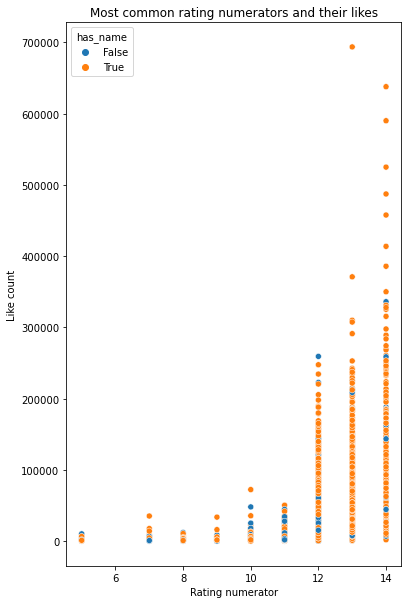

In [121]:
plt.figure(figsize=(6, 10))
sns.scatterplot(data=df_common_rated_values, x="rating_numerator", y="likes_count", hue="has_name")
plt.title('Most common rating numerators and their likes')
plt.ylabel('Like count')
plt.xlabel('Rating numerator');

- most liked tweets has high numerator rating and has a dog with a name in the tweet.
- there doesn't seem te be a high correlation with dog_rates's rating and the amount of like a tweet gets.

From the original dataframe I will try to get discarded columns

In [122]:
df_original_id_updated = df_tweets_original.copy()

In [123]:
df_original_id_updated.id = df_original_id_updated.id.astype(str)

In [124]:
df_tweets_enhanced = pd.merge(df_original_id_updated[["id", "video", "photos","thumbnail"]], df_tweets, how="inner", on=["id"])

In [125]:
df_tweets_enhanced.head(2)

,id,video,photos,thumbnail,tweet,replies_count,retweets_count,likes_count,datetime,dog_name,rating_numerator,rating_denominator,dog_stage,breed_prediction
0,1367943120906686466,1,[https://pbs.twimg.com/media/Evvo-82UUAUrVk_.j...,https://pbs.twimg.com/media/Evvo-82UUAUrVk_.jpg,This is Otis. He broke his femur jumping out o...,148,1672,27796,2021-03-06 00:00:29-03:00,Otis,13,10,NaN,kelpie
1,1367882960406421507,1,[https://pbs.twimg.com/media/EvuyTV3UcAQXdYN.j...,https://pbs.twimg.com/media/EvuyTV3UcAQXdYN.jpg,This is King. He’s been living on the streets ...,99,2224,22729,2021-03-05 20:01:26-03:00,King,13,10,NaN,dingo


In [126]:
df_tweets_enhanced['photo_count'] = df_tweets_enhanced.apply(lambda x: len(x.photos), axis=1)

In [127]:
df_tweets_enhanced['photo_exists'] = df_tweets_enhanced['photo_count'] > 0

In [128]:
df_tweets_enhanced.video.value_counts()

1    3152
0     121
Name: video, dtype: int64

In [129]:
df_tweets_enhanced.head()

,id,video,photos,thumbnail,tweet,replies_count,retweets_count,likes_count,datetime,dog_name,rating_numerator,rating_denominator,dog_stage,breed_prediction,photo_count,photo_exists
0,1367943120906686466,1,[https://pbs.twimg.com/media/Evvo-82UUAUrVk_.j...,https://pbs.twimg.com/media/Evvo-82UUAUrVk_.jpg,This is Otis. He broke his femur jumping out o...,148,1672,27796,2021-03-06 00:00:29-03:00,Otis,13,10,NaN,kelpie,4,True
1,1367882960406421507,1,[https://pbs.twimg.com/media/EvuyTV3UcAQXdYN.j...,https://pbs.twimg.com/media/EvuyTV3UcAQXdYN.jpg,This is King. He’s been living on the streets ...,99,2224,22729,2021-03-05 20:01:26-03:00,King,13,10,NaN,dingo,2,True
2,1367216213915443201,1,[],https://pbs.twimg.com/ext_tw_video_thumb/13672...,This is Minnie. She’s the Executive Pen Transp...,1256,29356,195085,2021-03-03 23:52:01-03:00,Minnie,13,10,NaN,dingo,0,False
3,1367160218337959941,1,[],https://pbs.twimg.com/media/EvkWUcyVEAIA8Y0.jpg,This is Tuk Tuk. He’s the cutest travel compan...,199,1043,18565,2021-03-03 20:09:31-03:00,Tuk Tuk,14,10,NaN,dingo,0,False
4,1366831649690816513,1,[https://pbs.twimg.com/media/Evf2I9oVIAIN24G.jpg],https://pbs.twimg.com/media/Evf2I9oVIAIN24G.jpg,This is Gussie. She took over your Zoom call w...,426,7777,105478,2021-03-02 22:23:54-03:00,Gussie,12,10,NaN,Labrador_retriever,1,True


In [130]:
df_tweets_enhanced.video.sum()

3152

In [131]:
df_tweets_enhanced.photo_count.sum()

4822

In [132]:
df_monthly_media =  df_tweets_enhanced.groupby(pd.Grouper(key='datetime',freq='M'))[['photo_count','video', 'photo_exists']].sum().reset_index()

In [133]:
df_monthly_media.head()

,datetime,photo_count,video,photo_exists
0,2015-11-30 00:00:00-03:00,304,292,292
1,2015-12-31 00:00:00-03:00,412,362,354
2,2016-01-31 00:00:00-03:00,200,164,156
3,2016-02-29 00:00:00-03:00,137,102,99
4,2016-03-31 00:00:00-03:00,148,108,107


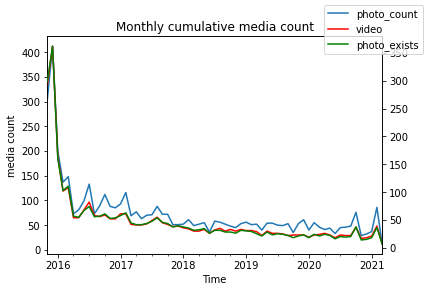

In [134]:
# https://stackoverflow.com/questions/47591650/second-y-axis-time-series-seaborn
# If I leave seaborn alone it does great job displaying the dataframe, but I can't change the x access and have the two plot lines with the consistant legend.

ax = df_monthly_media.plot(x="datetime", y="photo_count", legend=False)
plt.xlabel('Time');
plt.ylabel('media count')
ax2 = ax.twinx()
df_monthly_media.plot(x="datetime", y="video", ax=ax2, legend=False, color="r")
ax3 = ax.twinx()
df_monthly_media.plot(x="datetime", y="photo_exists", ax=ax3, legend=False, color="g")
ax.figure.legend()
plt.axis('off')
plt.title('Monthly cumulative media count')
plt.show()

- there can only be one video in a tweet
- there could be multiple images in one tweet
- if we look at the tweets with an image or a video, (green and red lines) they are quite similar.
- when green and blue line have distance between them, those are the months with multiple images in one tweet. if the distance is as high as the green line, that means on average there are two images in one tweet. however looking at the chart we can see there isn't a month that has more than ~1.5 images per tweet

In [135]:
import ipyplot
df_highest_rated = df_tweets_enhanced.sort_values(by=['likes_count'], ascending=False)
top_liked_images = df_highest_rated[:18]['thumbnail'].to_numpy()
ipyplot.plot_images(top_liked_images, max_images=20, img_width=150)

In [136]:
df_highest_rated.head()

,id,video,photos,thumbnail,tweet,replies_count,retweets_count,likes_count,datetime,dog_name,rating_numerator,rating_denominator,dog_stage,breed_prediction,photo_count,photo_exists
394,1186432040394055685,1,[],https://pbs.twimg.com/ext_tw_video_thumb/11864...,This is Willo. She likes to awoo while she eat...,7233,165679,693747,2019-10-22 03:00:15-03:00,Willo,13,10,NaN,NaN,0,False
723,1054404072164548611,1,[],https://pbs.twimg.com/ext_tw_video_thumb/10544...,This is Riley. Every morning he hangs over the...,4049,156830,637945,2018-10-22 19:08:15-03:00,Riley,14,10,NaN,NaN,0,False
377,1194656412929908736,1,[https://pbs.twimg.com/media/EJRFrA2U0AA-Kt2.j...,https://pbs.twimg.com/media/EJRFrA2U0AA-Kt2.jpg,This is Narwhal. He was born with an extra tai...,6297,123113,590147,2019-11-13 19:40:59-03:00,Narwhal,14,10,NaN,Chihuahua,4,True
844,1013492719463817216,1,[https://pbs.twimg.com/media/DhCmQKMU8AARv0_.j...,https://pbs.twimg.com/media/DhCmQKMU8AARv0_.jpg,This is Todd. He saved his human from a rattle...,4601,115880,574167,2018-07-01 21:41:08-03:00,Todd,15,10,NaN,golden_retriever,2,True
388,1189953715349815296,1,[],https://pbs.twimg.com/ext_tw_video_thumb/11899...,This is Benjamin. He is Froot Loops. 14/10 ht...,2561,101059,525027,2019-10-31 20:14:08-03:00,Benjamin,14,10,NaN,NaN,0,False


In [137]:
# Photo only images
top_retweeted_images = df_tweets_enhanced[df_tweets_enhanced.photo_exists].sort_values(by=['retweets_count'], ascending=False)[:18]['thumbnail'].to_numpy()
ipyplot.plot_images(top_retweeted_images, max_images=20, img_width=150)

In [138]:
df_tweets_enhanced.rating_denominator = df_tweets_enhanced.rating_denominator.astype(int)

In [139]:
df_images_with_large_denominator = df_tweets_enhanced[df_tweets_enhanced.rating_denominator > 17].sort_values(by=['likes_count'], ascending=False)[:18]['thumbnail'].to_numpy()
ipyplot.plot_images(df_images_with_large_denominator, max_images=20, img_width=150)

In [140]:
df_tweets.to_csv("./data/twitter_archive_master.csv", index=False)